In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("../data/train_data.csv")
affected_df = df[df['target'] ==1 ] # separate the affected rows and not affected rows.
not_affected_df = df[df['target'] == 0 ]
df.info()

l = set() # contains all analysed columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 76 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           65535 non-null  object 
 1   ProductName                         65535 non-null  object 
 2   EngineVersion                       65535 non-null  object 
 3   AppVersion                          65535 non-null  object 
 4   SignatureVersion                    65535 non-null  object 
 5   IsBetaUser                          65535 non-null  int64  
 6   RealTimeProtectionState             65493 non-null  float64
 7   IsPassiveModeEnabled                65535 non-null  int64  
 8   AntivirusConfigID                   65490 non-null  float64
 9   NumAntivirusProductsInstalled       65490 non-null  float64
 10  NumAntivirusProductsEnabled         65490 non-null  float64
 11  HasTpm                              65535

In [34]:
def plot_and_compare (df, affected, not_affected_df , column_name):
    """ Plots 2 things 
        1. histogram to visualise the distribution
        2. box plot to visualise the IQR for different classes. 
    """
    l.add(column_name )
    sns.histplot(data=df, x=column_name, kde=True)
    #histogram plot to show distribution
    plt.show()
    x_limit = df[column_name].max() * 1.05  # Add 5% padding for better visuals

      # Boxplot to compare the distribution
    sns.boxplot(data=affected_df, x=column_name)
    plt.title('affected plot')
    plt.xlim(0, x_limit) # Ensures same scale has been followed to avoid biased conclusion.
    plt.show()

    sns.boxplot(data=not_affected_df, x=column_name)
    plt.title('Not affected plot')
    plt.xlim(0, x_limit) # Ensures same scale has been followed to avoid biased conclusion.
    plt.show()


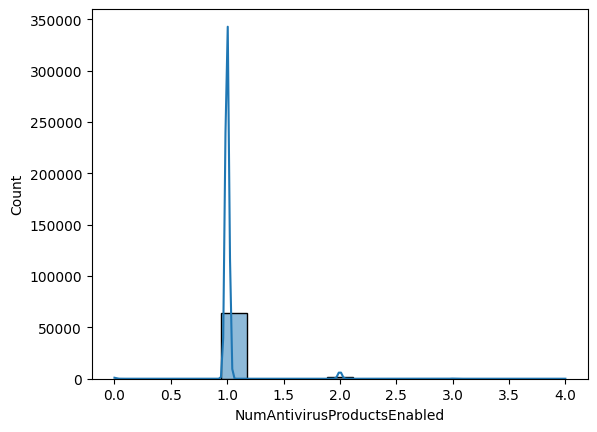

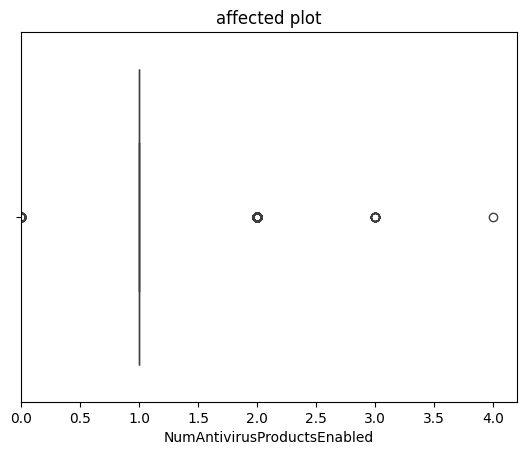

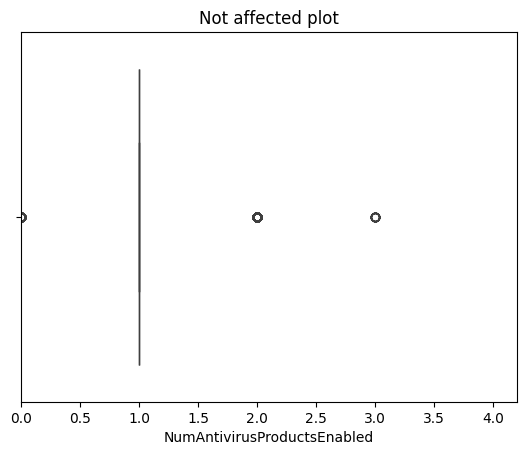

In [35]:
plot_and_compare(df,  affected_df , not_affected_df , 'NumAntivirusProductsEnabled') # not useful

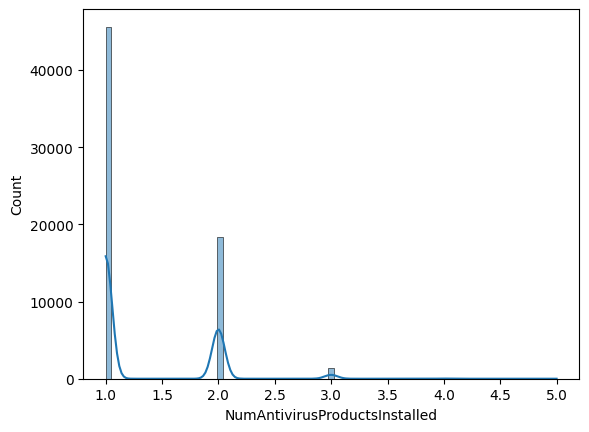

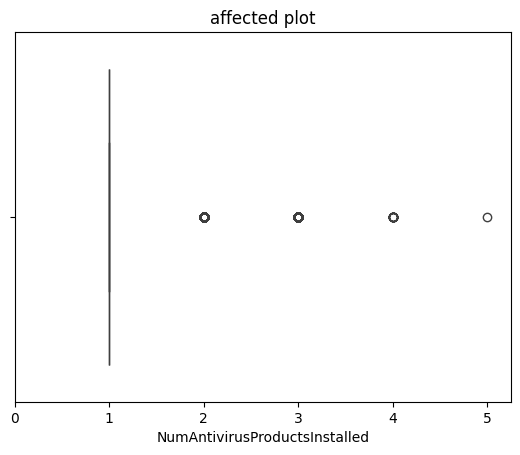

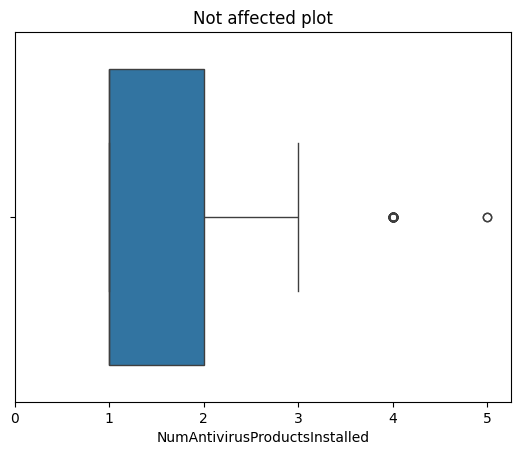

In [36]:
plot_and_compare(df,  affected_df , not_affected_df , "NumAntivirusProductsInstalled") # Useful column

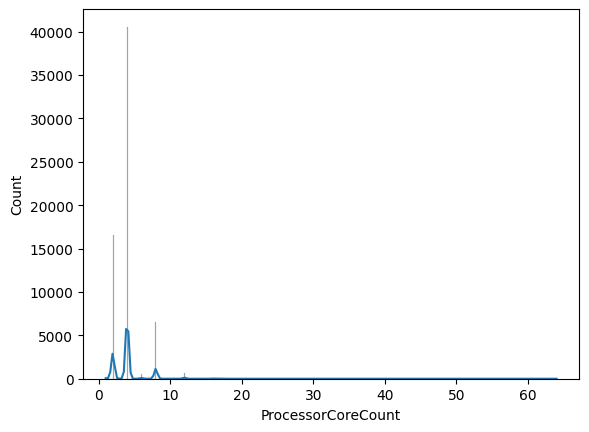

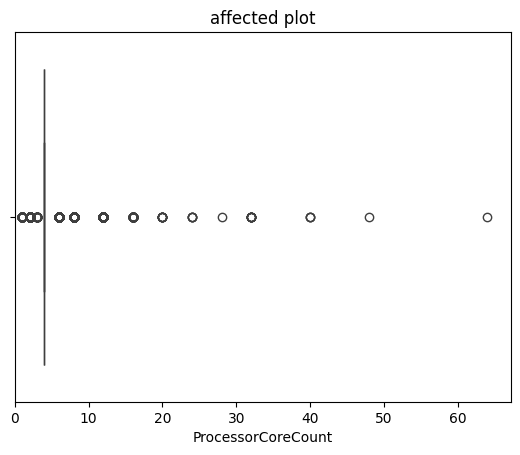

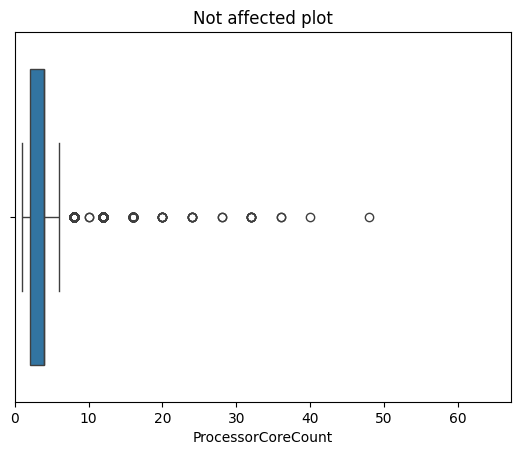

18

In [37]:
plot_and_compare(df,  affected_df , not_affected_df , 'ProcessorCoreCount') # needs more investigation interesting data
df['ProcessorCoreCount'].nunique()

324


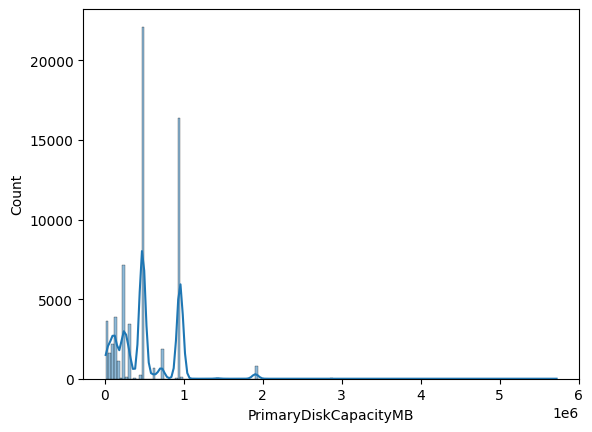

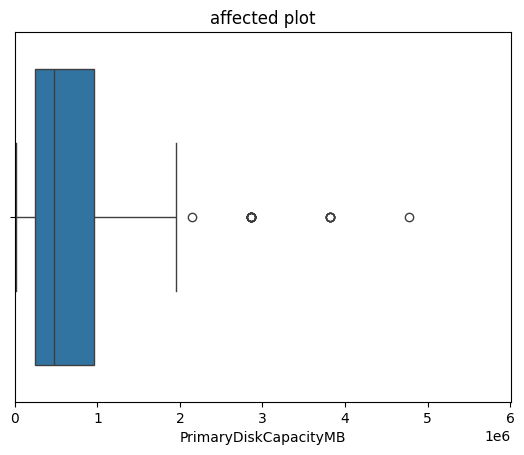

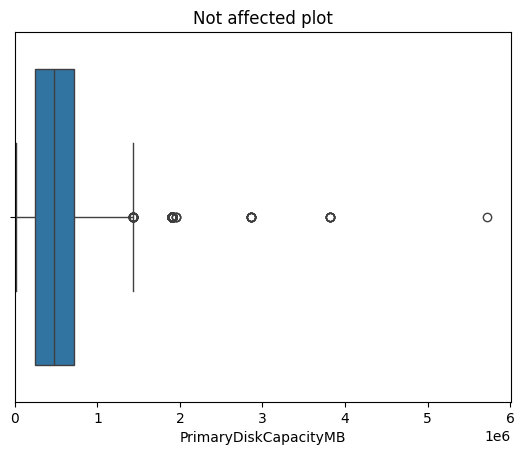

In [38]:
print(df['PrimaryDiskCapacityMB'].nunique())
plot_and_compare(df,  affected_df , not_affected_df , 'PrimaryDiskCapacityMB')# might be useful


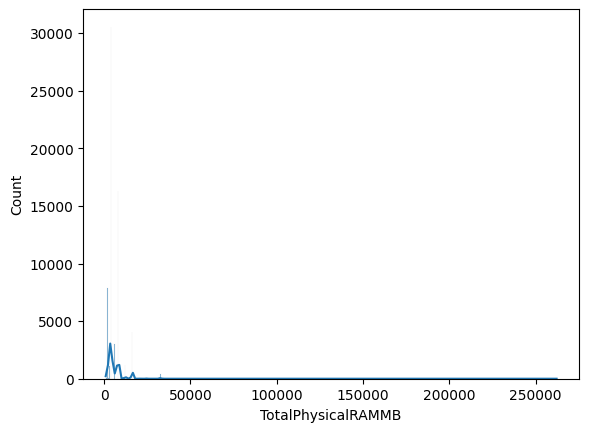

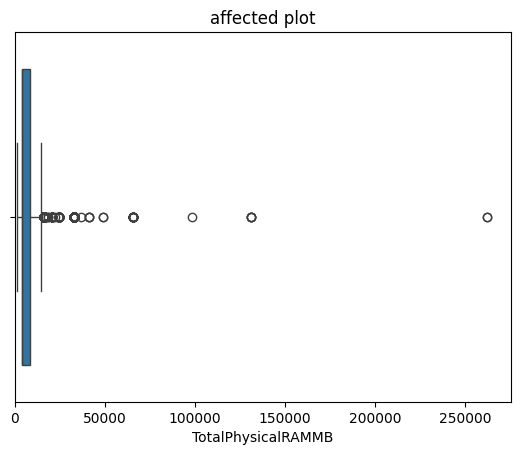

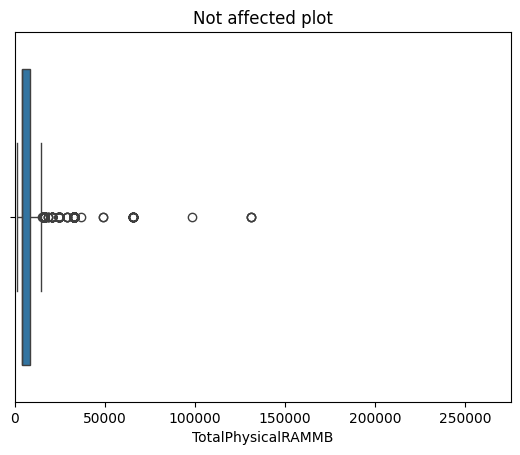

In [39]:
plot_and_compare(df,  affected_df , not_affected_df , 'TotalPhysicalRAMMB')
# non predictive because the box plots ( whisker lines , box) are litreally same

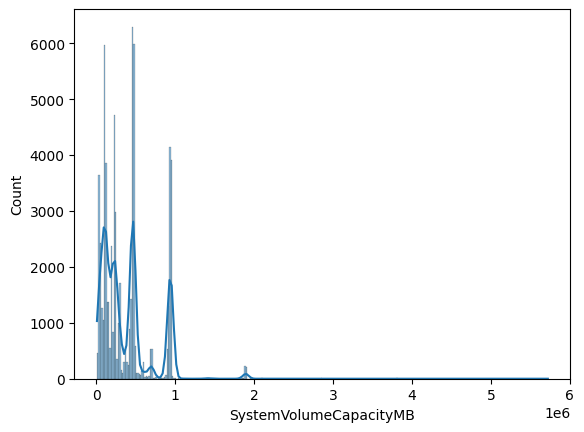

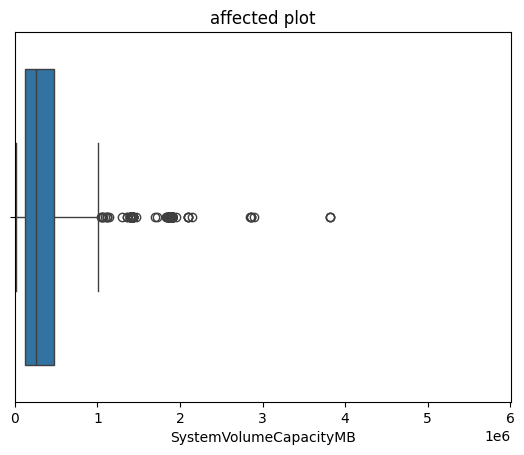

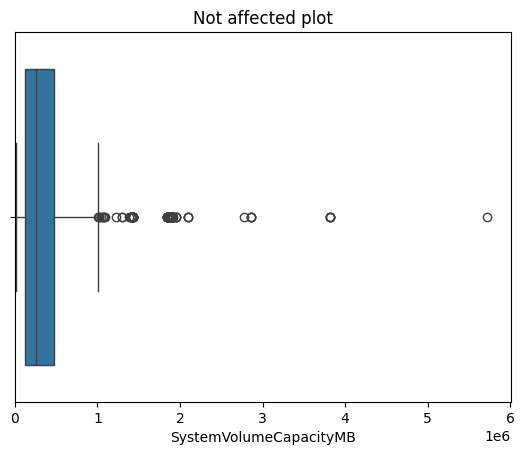

In [40]:
plot_and_compare(df,  affected_df , not_affected_df , 'SystemVolumeCapacityMB')
# non predictive because the box plots ( whisker lines , box) are litreally same

In [41]:
def count_classes (df, affected_df , unaffected_df , column ):
  """ Nothinng fancy just counts the classes to print the number of classes""" 
  count = df[column].nunique()
  print("No of "+ column , count, sep = ":")
  l.add(column )

# Just a check 
# count_classes(df,affected_df , not_affected_df, "MachineID" )
# count_classes(df,affected_df , not_affected_df, "CityID" )
# count_classes(df, affected_df, not_affected_df , "CountryID")


Exploring columns with lesser cardinality features to find patterns.
'PlatformType' : Platform Type Derived from OS and Processor Information
 'Processor' : Processor Architecture of the Installed OS
 'DeviceFamily'

In [42]:
def count_ploting(df , affected_df , not_affected_df , column ):
  crosstab = pd.crosstab(df[column], df['target'])
  print("--- Raw Counts ---")
  print(crosstab)
  crosstab_norm = pd.crosstab(df[column], df['target'], normalize='index')
  print("\n--- Proportions (percentages) ---")
  changes = crosstab_norm[1]-crosstab_norm[0]
  print(crosstab_norm)
  print("\n--- Differences  (percentages) ---")
  print(changes) 
    
  sns.countplot(df , x= column)
  plt.show()
  sns.countplot(df , x= column, hue = 'target') # categorial count plot compares based on categories.
  plt.show()
    
  
  crosstab_norm.plot(kind = 'bar', stacked = True)
  plt.show()  

  l.add(column )


No of PlatformType:4
--- Raw Counts ---
target            0      1
PlatformType              
windows10     31885  32556
windows2016      17      3
windows7         85     68
windows8        455    466

--- Proportions (percentages) ---
target               0         1
PlatformType                    
windows10     0.494794  0.505206
windows2016   0.850000  0.150000
windows7      0.555556  0.444444
windows8      0.494028  0.505972

--- Differences  (percentages) ---
PlatformType
windows10      0.010413
windows2016   -0.700000
windows7      -0.111111
windows8       0.011944
dtype: float64


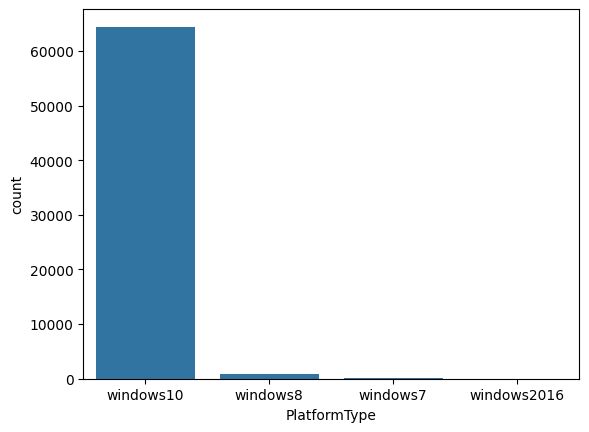

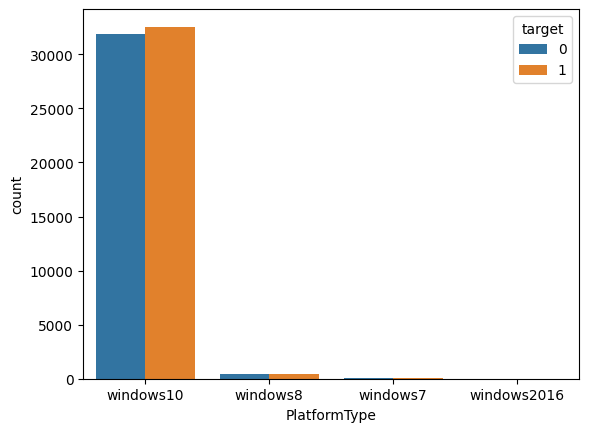

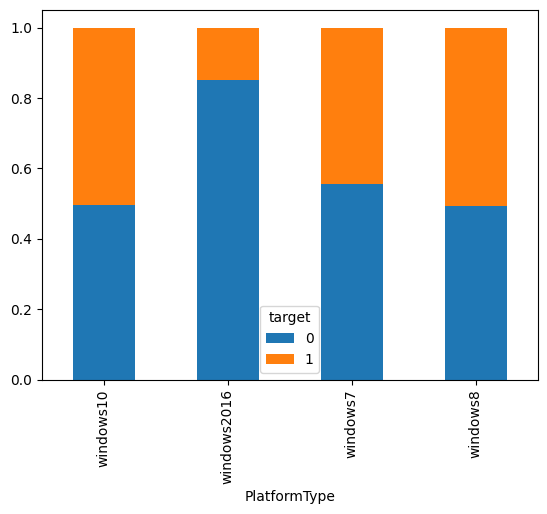

In [43]:
count_classes(df, affected_df , not_affected_df, 'PlatformType' )
count_ploting(df, affected_df , not_affected_df, 'PlatformType') # windows2016 isnt affected as much as others
# pattern should be investigates

No of RealTimeProtectionState:6
--- Raw Counts ---
target                       0      1
RealTimeProtectionState              
0.0                        922    491
1.0                          4      4
3.0                          8      5
5.0                        117     22
7.0                      31332  32454
8.0                         35     99

--- Proportions (percentages) ---
target                          0         1
RealTimeProtectionState                    
0.0                      0.652512  0.347488
1.0                      0.500000  0.500000
3.0                      0.615385  0.384615
5.0                      0.841727  0.158273
7.0                      0.491205  0.508795
8.0                      0.261194  0.738806

--- Differences  (percentages) ---
RealTimeProtectionState
0.0   -0.305025
1.0    0.000000
3.0   -0.230769
5.0   -0.683453
7.0    0.017590
8.0    0.477612
dtype: float64


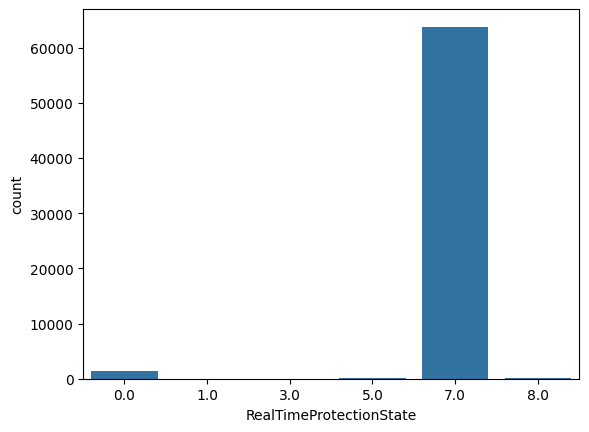

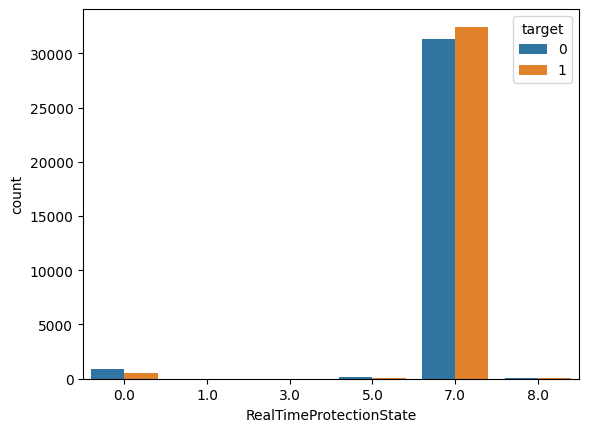

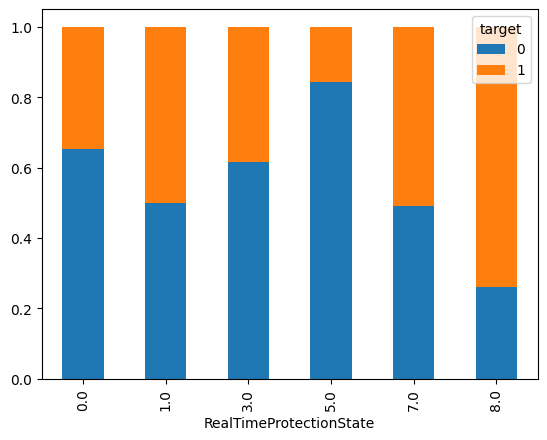

In [44]:
count_classes(df, affected_df , not_affected_df, 'RealTimeProtectionState' )
count_ploting(df, affected_df , not_affected_df, 'RealTimeProtectionState')

No of PrimaryDiskType:4
--- Raw Counts ---
target               0      1
PrimaryDiskType              
HDD              21172  22083
SSD               9145   9250
UNKNOWN           1121    933
Unspecified        998    818

--- Proportions (percentages) ---
target                  0         1
PrimaryDiskType                    
HDD              0.489469  0.510531
SSD              0.497146  0.502854
UNKNOWN          0.545764  0.454236
Unspecified      0.549559  0.450441

--- Differences  (percentages) ---
PrimaryDiskType
HDD            0.021061
SSD            0.005708
UNKNOWN       -0.091529
Unspecified   -0.099119
dtype: float64


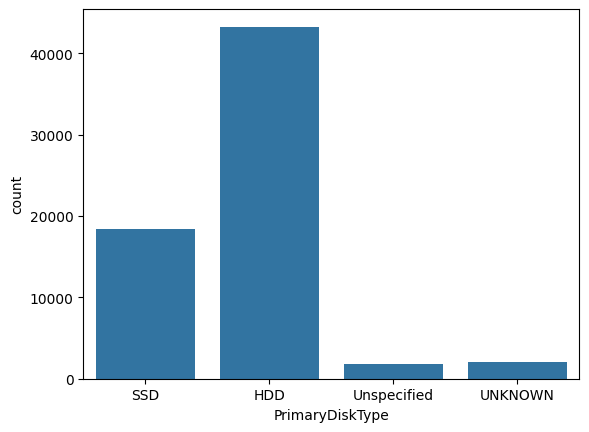

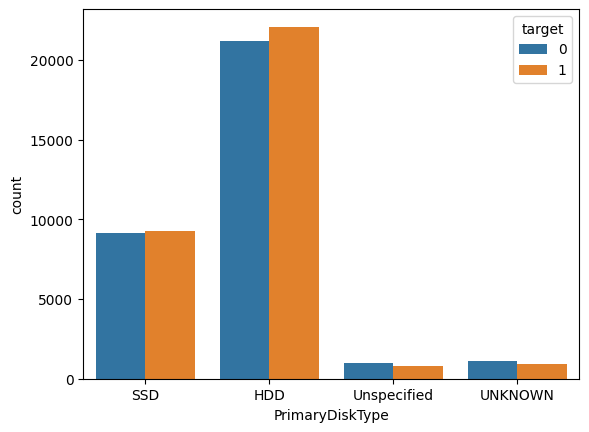

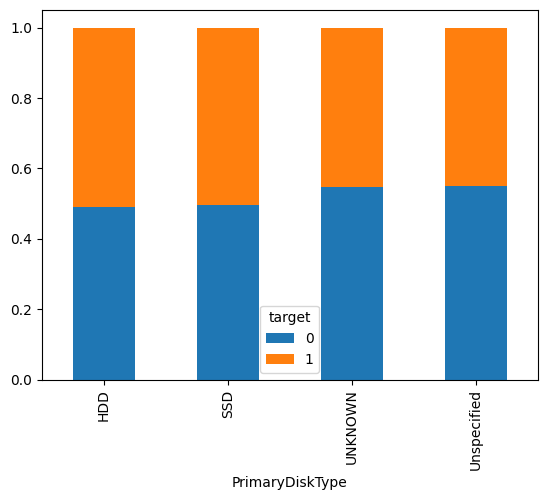

In [45]:
count_classes(df, affected_df , not_affected_df, 'PrimaryDiskType')
count_ploting(df, affected_df , not_affected_df, 'PrimaryDiskType')  # low impact

No of Processor:3
--- Raw Counts ---
target         0      1
Processor              
arm64          1      1
x64        28910  30916
x86         3531   2176

--- Proportions (percentages) ---
target            0         1
Processor                    
arm64      0.500000  0.500000
x64        0.483235  0.516765
x86        0.618714  0.381286

--- Differences  (percentages) ---
Processor
arm64    0.000000
x64      0.033531
x86     -0.237428
dtype: float64


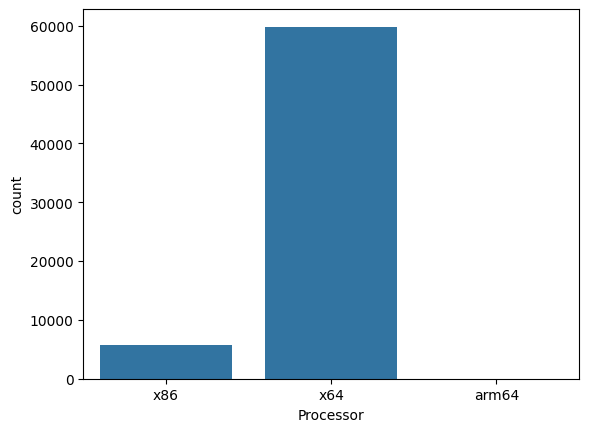

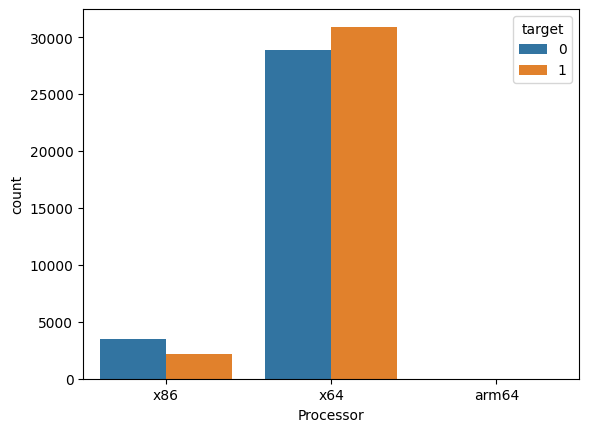

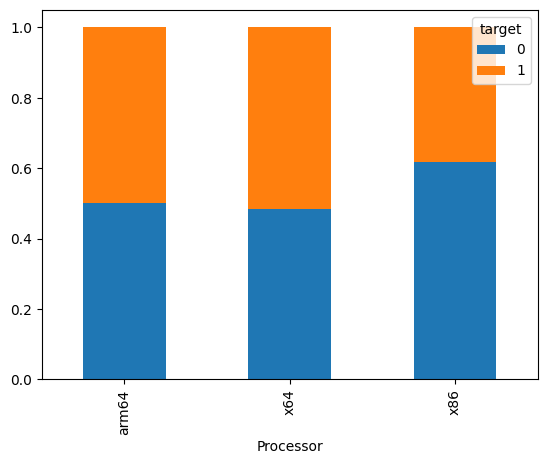

In [46]:
count_classes(df, affected_df , not_affected_df, 'Processor')
count_ploting(df, affected_df , not_affected_df, 'Processor')
# useful predictor x32 infected more than x86 processor 

Categories to keep: Index(['Home', 'Pro'], dtype='object', name='SKUEditionName')
--- Raw Counts ---
target                      0      1
SKUEditionName_grouped              
Home                    20693  20505
Other                     437    434
Pro                     11312  12154

--- Proportions (percentages) ---
target                         0         1
SKUEditionName_grouped                    
Home                    0.502282  0.497718
Other                   0.501722  0.498278
Pro                     0.482059  0.517941

--- Differences  (percentages) ---
SKUEditionName_grouped
Home    -0.004563
Other   -0.003444
Pro      0.035882
dtype: float64


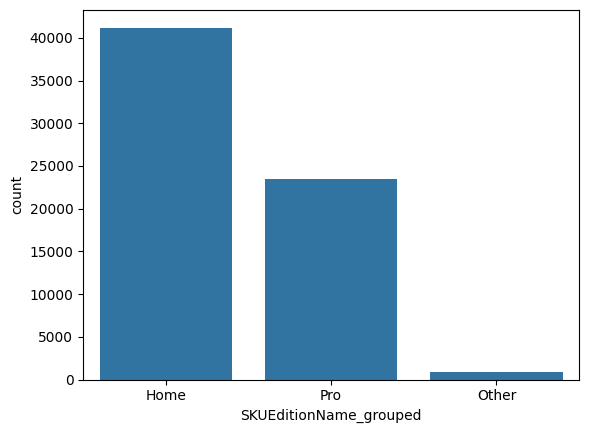

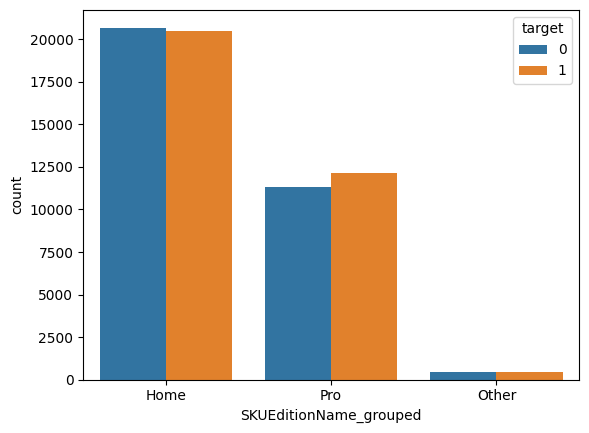

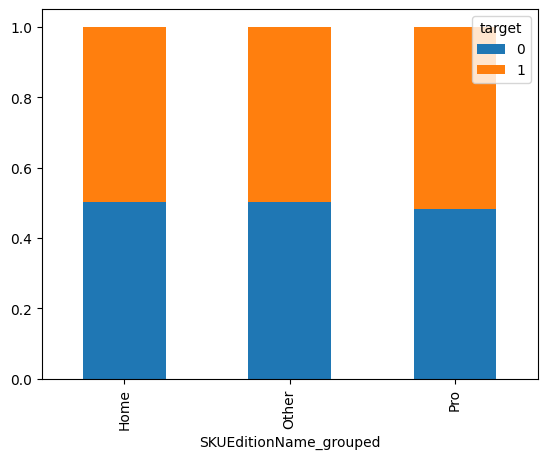

In [47]:
def group_categories_plot(df, affected_df , not_affected_df , column, no_columns):
    top_editions = df[column].value_counts().nlargest(no_columns).index
    print("Categories to keep:", top_editions)
    df[f'{column}_grouped'] = np.where(df[column].isin(top_editions), 
                                         df[column], 
                                         'Other')
    count_ploting(df, affected_df, not_affected_df, column+'_grouped' )
    l.add(column)

#count_classes(df, affected_df , not_affected_df, 'SKUEditionName')
#count_ploting(df, affected_df , not_affected_df, 'SKUEditionName') 
# count plotting lead to grouping the columns due to a high cardinality
group_categories_plot(df, affected_df, not_affected_df, 'SKUEditionName' , 2) # I see two major columns so I need to group other columns

# useful

Categories to keep: Index(['Core', 'Professional', 'CoreSingleLanguage'], dtype='object', name='OSEdition')
--- Raw Counts ---
target                  0      1
OSEdition_grouped               
Core                13435  12247
CoreSingleLanguage   6718   7757
Other                1306   1341
Professional        10983  11748

--- Proportions (percentages) ---
target                     0         1
OSEdition_grouped                     
Core                0.523129  0.476871
CoreSingleLanguage  0.464111  0.535889
Other               0.493389  0.506611
Professional        0.483173  0.516827

--- Differences  (percentages) ---
OSEdition_grouped
Core                 -0.046258
CoreSingleLanguage    0.071779
Other                 0.013223
Professional          0.033654
dtype: float64


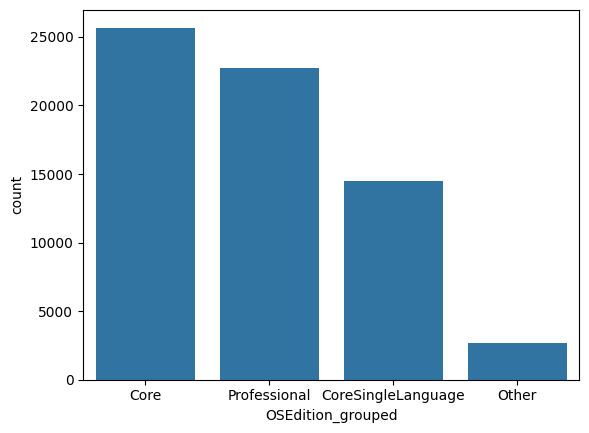

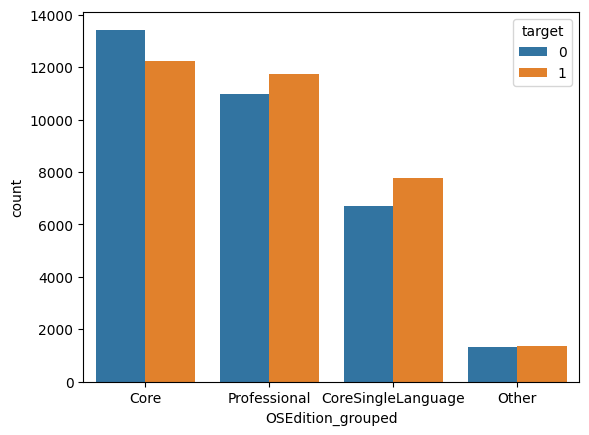

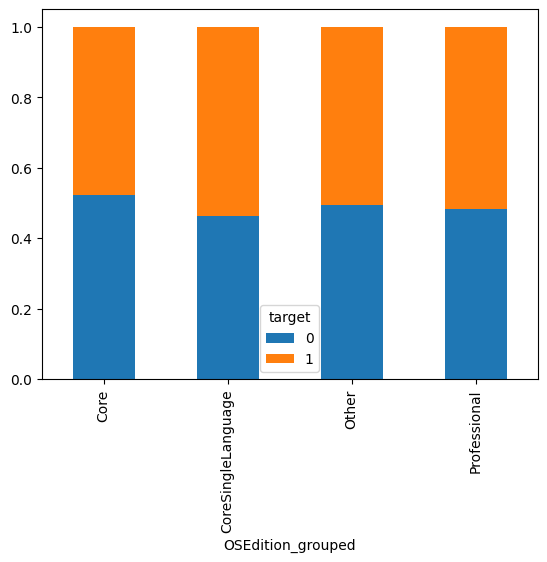

array(['Core', 'Professional', 'CoreSingleLanguage', 'ProfessionalN',
       'ProfessionalEducation', 'CoreCountrySpecific', 'Cloud',
       'Education', 'EnterpriseS', 'Enterprise', 'EnterpriseSN', 'CoreN',
       'EducationN', 'ServerStandard', 'ProfessionalEducationN',
       'ServerStandardEval', 'EnterpriseN', 'ServerSolution'],
      dtype=object)

In [54]:
#count_classes(df, affected_df , not_affected_df, 'OSEdition')
#count_ploting(df, affected_df , not_affected_df, 'OSEdition')
group_categories_plot(df, affected_df, not_affected_df,'OSEdition' , 3) # I see 3 major columns so I need to group other columns 
df['OSEdition'].unique()
#OSEdition good predictor

No of OSBuildNumber:23
Categories to keep: Index([17134, 16299, 15063, 14393, 10586], dtype='int64', name='OSBuildNumber')
--- Raw Counts ---
target                     0      1
OSBuildNumber_grouped              
10586                   1407   1151
14393                   2645   2193
15063                   2794   2628
16299                   9801   9627
17134                  14180  15928
Other                   1615   1566

--- Proportions (percentages) ---
target                        0         1
OSBuildNumber_grouped                    
10586                  0.550039  0.449961
14393                  0.546714  0.453286
15063                  0.515308  0.484692
16299                  0.504478  0.495522
17134                  0.470971  0.529029
Other                  0.507702  0.492298

--- Differences  (percentages) ---
OSBuildNumber_grouped
10586   -0.100078
14393   -0.093427
15063   -0.030616
16299   -0.008956
17134    0.058058
Other   -0.015404
dtype: float64


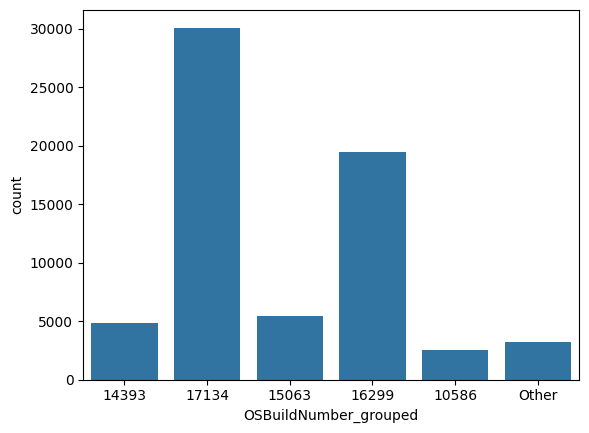

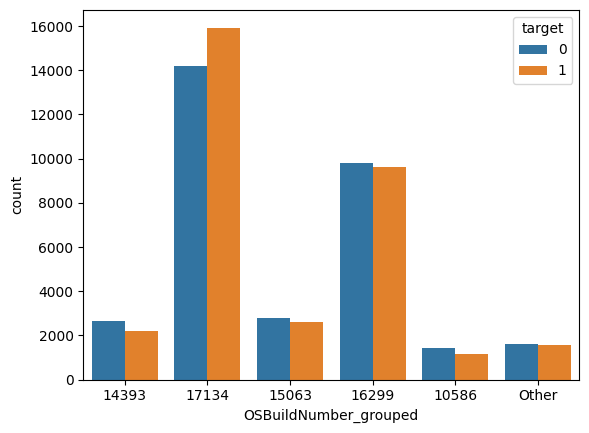

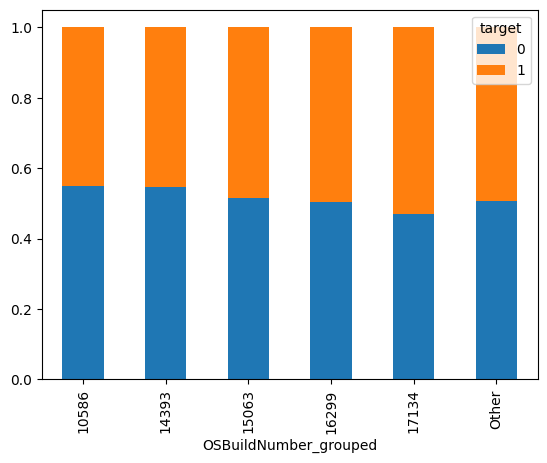

In [49]:
count_classes(df, affected_df , not_affected_df, 'OSBuildNumber')
"""count_ploting(df, affected_df , not_affected_df, 'OSBuildNumber')
"""
group_categories_plot(df, affected_df, not_affected_df, 'OSBuildNumber' , 5) # I see 5 major columns so I need to group other columns 


No of ChassisType:26
Categories to keep: Index(['Notebook', 'Desktop', 'Laptop', 'Portable'], dtype='object', name='ChassisType')
--- Raw Counts ---
target                   0      1
ChassisType_grouped              
Desktop               6541   7192
Laptop                2603   2583
Notebook             19119  19748
Other                 2831   2269
Portable              1348   1301

--- Proportions (percentages) ---
target                      0         1
ChassisType_grouped                    
Desktop              0.476298  0.523702
Laptop               0.501928  0.498072
Notebook             0.491908  0.508092
Other                0.555098  0.444902
Portable             0.508871  0.491129

--- Differences  (percentages) ---
ChassisType_grouped
Desktop     0.047404
Laptop     -0.003857
Notebook    0.016183
Other      -0.110196
Portable   -0.017743
dtype: float64


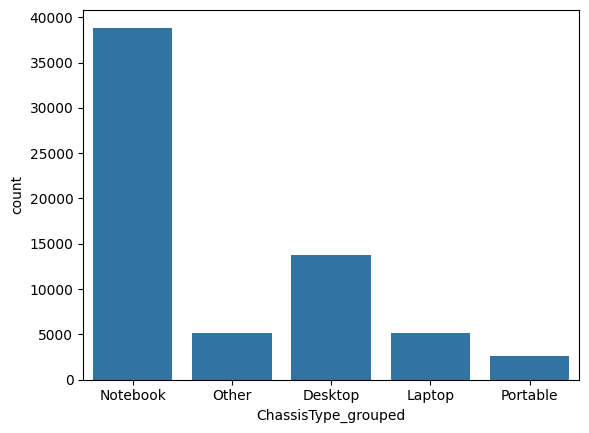

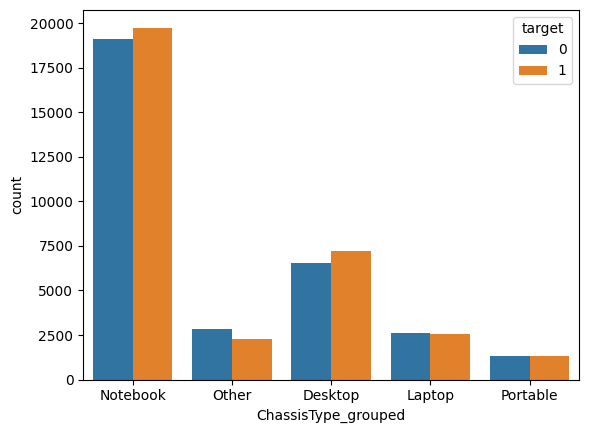

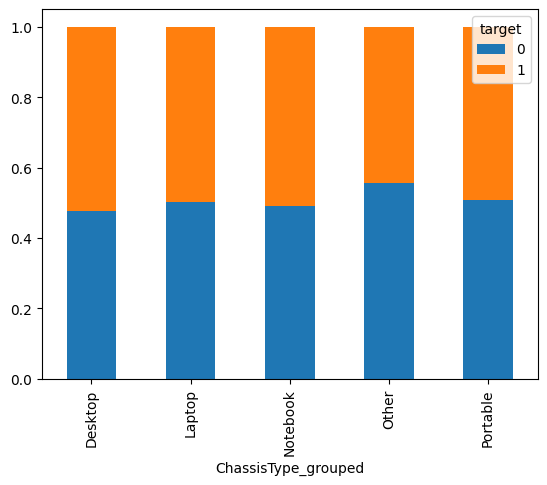

In [50]:
"""count_classes(df, affected_df , not_affected_df, 'ChassisType')
count_ploting(df, affected_df , not_affected_df, 'ChassisType') 
"""
count_classes(df, affected_df , not_affected_df, 'ChassisType')
group_categories_plot(df, affected_df, not_affected_df, 'ChassisType' , 4) # I see 3 major columns so I need to group other columns 
# less useful. 

High cardinality columns below


No of AntivirusConfigID:1518
Categories to keep: Index([53447.0, 7945.0, 47238.0, 62773.0, 46413.0], dtype='float64', name='AntivirusConfigID')
--- Raw Counts ---
target                         0      1
AntivirusConfigID_grouped              
46413.0                      462    438
47238.0                     1411   1238
53447.0                    19018  24534
62773.0                     1078    599
7945.0                      2333   1269
Other                       8140   5015

--- Proportions (percentages) ---
target                            0         1
AntivirusConfigID_grouped                    
46413.0                    0.513333  0.486667
47238.0                    0.532654  0.467346
53447.0                    0.436673  0.563327
62773.0                    0.642815  0.357185
7945.0                     0.647696  0.352304
Other                      0.618776  0.381224

--- Differences  (percentages) ---
AntivirusConfigID_grouped
46413.0   -0.026667
47238.0   -0.065308
53447.0    0

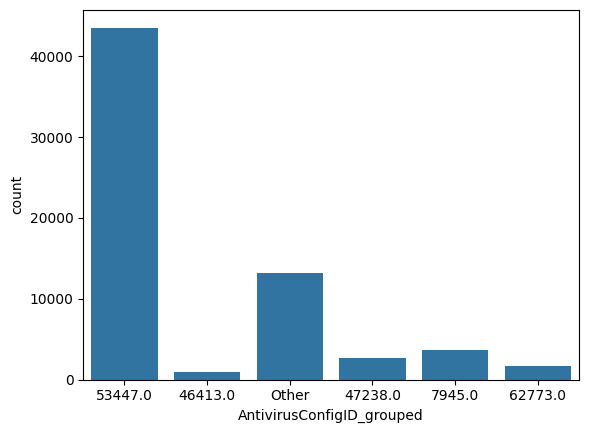

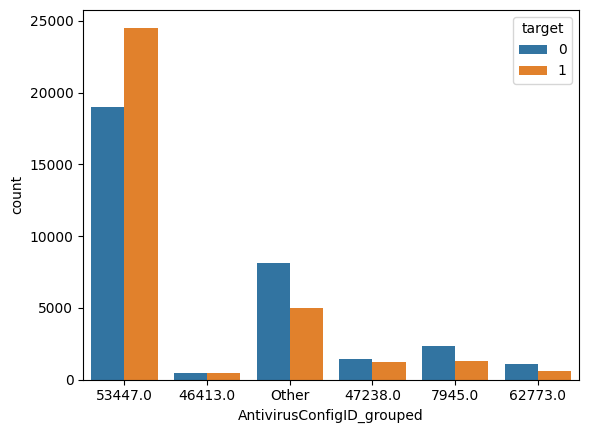

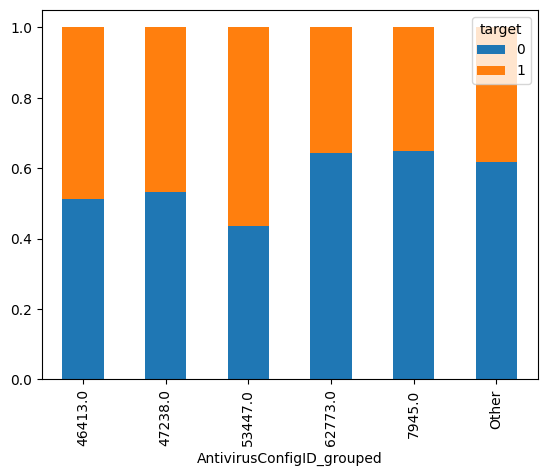

In [51]:
#count_ploting (df, affected_df, not_affected_df , "AntivirusConfigID") 
# Suspicious because intutively antivirus cofig could be a strong predictor so analysing by grouping the most occuring classes,
count_classes(df, affected_df, not_affected_df, 'AntivirusConfigID')
group_categories_plot(df, affected_df, not_affected_df, "AntivirusConfigID" , 5)




No of AppVersion:69
Categories to keep: Index(['4.18.1807.18075', '4.18.1806.18062', '4.12.16299.15',
       '4.16.17656.18052', '4.14.17639.18041'],
      dtype='object', name='AppVersion')
--- Raw Counts ---
target                  0      1
AppVersion_grouped              
4.12.16299.15        1150    960
4.14.17639.18041     1117    499
4.16.17656.18052     1312    642
4.18.1806.18062      3400   3431
4.18.1807.18075     18954  21831
Other                6509   5730

--- Proportions (percentages) ---
target                     0         1
AppVersion_grouped                    
4.12.16299.15       0.545024  0.454976
4.14.17639.18041    0.691213  0.308787
4.16.17656.18052    0.671443  0.328557
4.18.1806.18062     0.497731  0.502269
4.18.1807.18075     0.464730  0.535270
Other               0.531824  0.468176

--- Differences  (percentages) ---
AppVersion_grouped
4.12.16299.15      -0.090047
4.14.17639.18041   -0.382426
4.16.17656.18052   -0.342886
4.18.1806.18062     0.004538
4.18.180

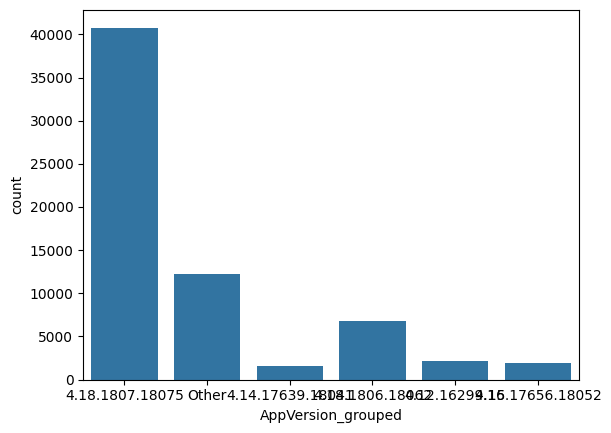

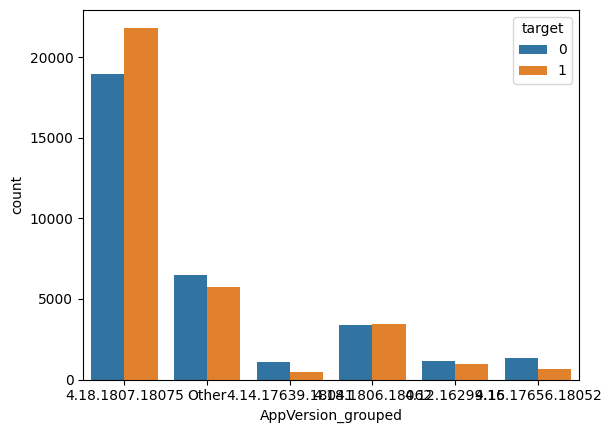

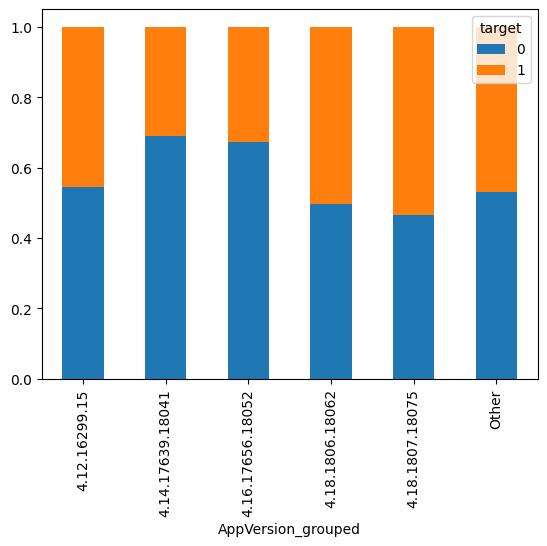

In [52]:
count_classes(df, affected_df, not_affected_df, 'AppVersion')
group_categories_plot(df, affected_df, not_affected_df, "AppVersion" , 5)

--- Raw Counts ---
target          0      1
IsBetaUser              
0           32442  33093

--- Proportions (percentages) ---
target             0         1
IsBetaUser                    
0           0.495033  0.504967

--- Differences  (percentages) ---
IsBetaUser
0    0.009934
dtype: float64


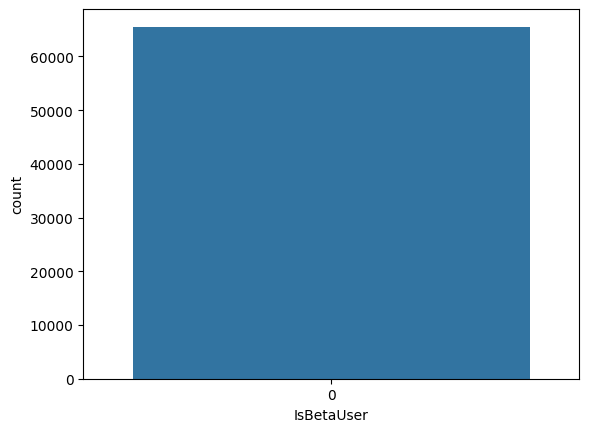

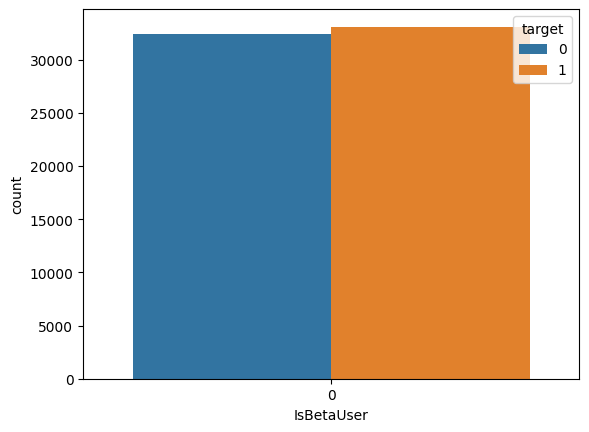

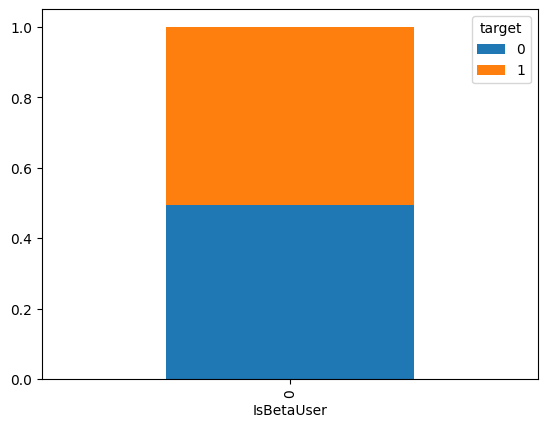

--- Raw Counts ---
target                    0      1
IsPassiveModeEnabled              
0                     31655  32685
1                       787    408

--- Proportions (percentages) ---
target                       0         1
IsPassiveModeEnabled                    
0                     0.491996  0.508004
1                     0.658577  0.341423

--- Differences  (percentages) ---
IsPassiveModeEnabled
0    0.016009
1   -0.317155
dtype: float64


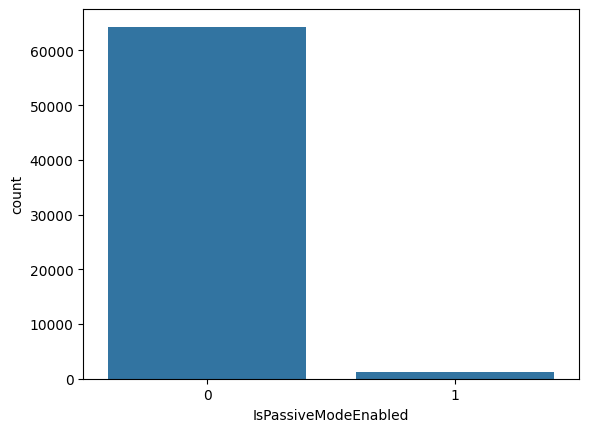

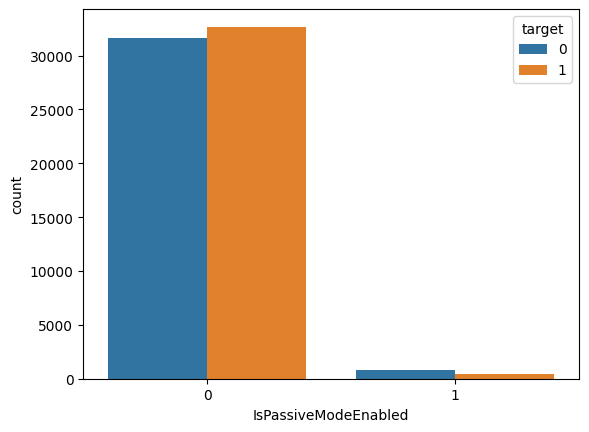

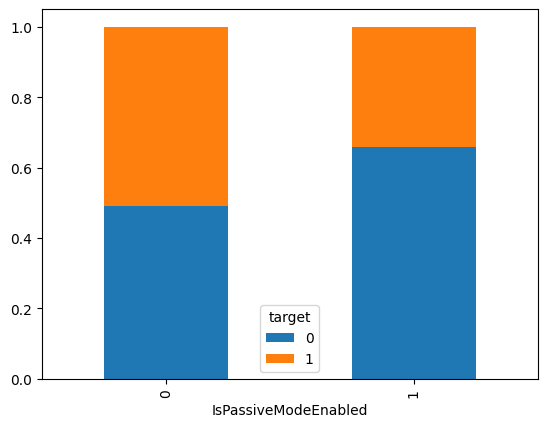

--- Raw Counts ---
target      0      1
HasTpm              
0         123     86
1       32319  33007

--- Proportions (percentages) ---
target         0         1
HasTpm                    
0       0.588517  0.411483
1       0.494734  0.505266

--- Differences  (percentages) ---
HasTpm
0   -0.177033
1    0.010532
dtype: float64


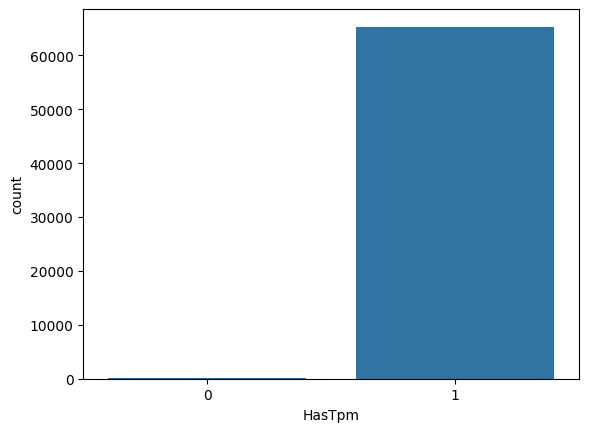

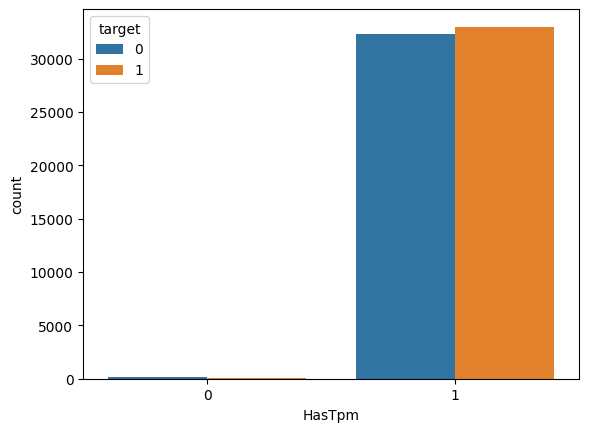

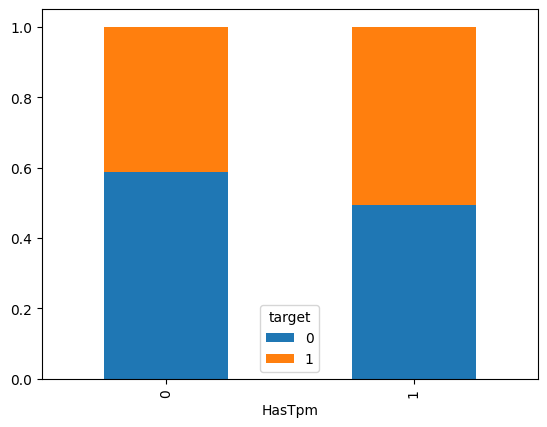

--- Raw Counts ---
target                 0      1
IsSystemProtected              
0.0                 1877   1067
1.0                30533  32013

--- Proportions (percentages) ---
target                    0         1
IsSystemProtected                    
0.0                0.637568  0.362432
1.0                0.488169  0.511831

--- Differences  (percentages) ---
IsSystemProtected
0.0   -0.275136
1.0    0.023663
dtype: float64


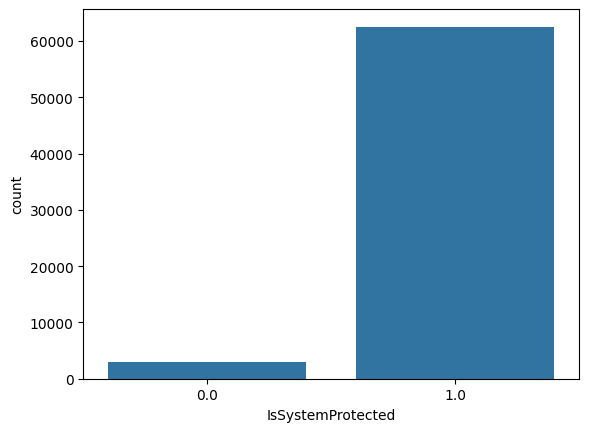

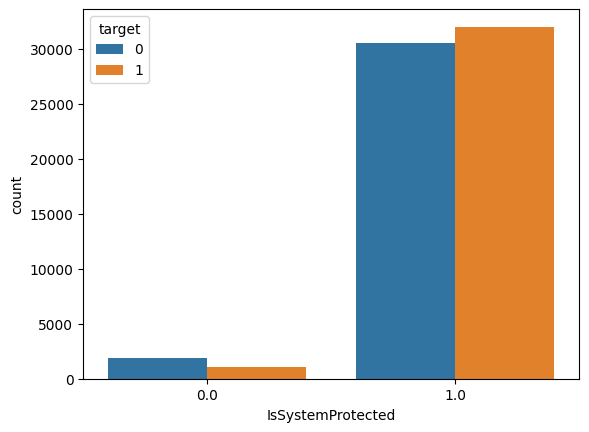

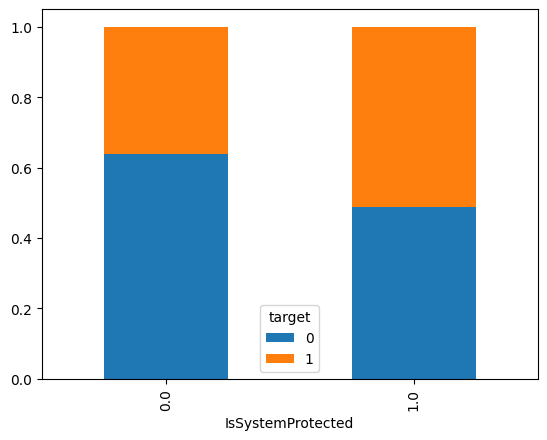

--- Raw Counts ---
target                       0      1
RealTimeProtectionState              
0.0                        922    491
1.0                          4      4
3.0                          8      5
5.0                        117     22
7.0                      31332  32454
8.0                         35     99

--- Proportions (percentages) ---
target                          0         1
RealTimeProtectionState                    
0.0                      0.652512  0.347488
1.0                      0.500000  0.500000
3.0                      0.615385  0.384615
5.0                      0.841727  0.158273
7.0                      0.491205  0.508795
8.0                      0.261194  0.738806

--- Differences  (percentages) ---
RealTimeProtectionState
0.0   -0.305025
1.0    0.000000
3.0   -0.230769
5.0   -0.683453
7.0    0.017590
8.0    0.477612
dtype: float64


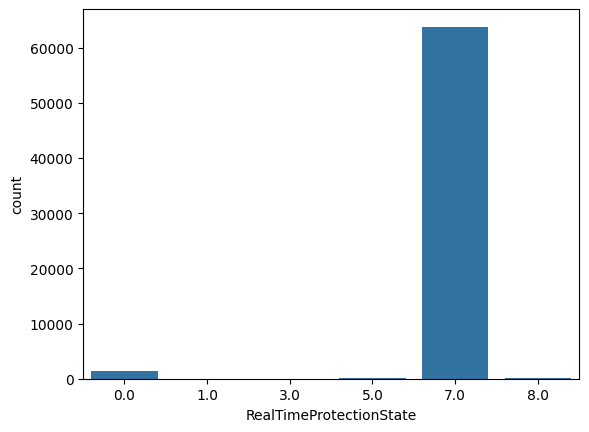

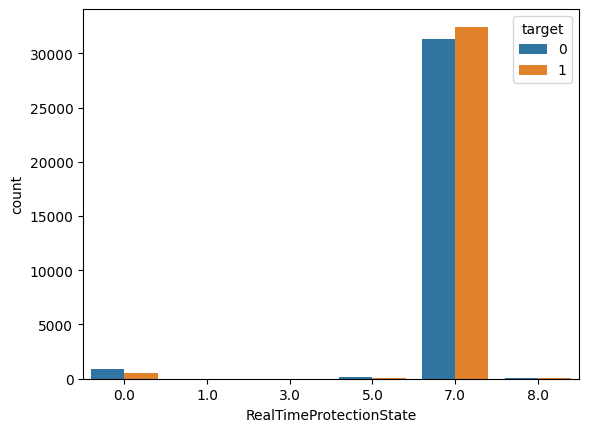

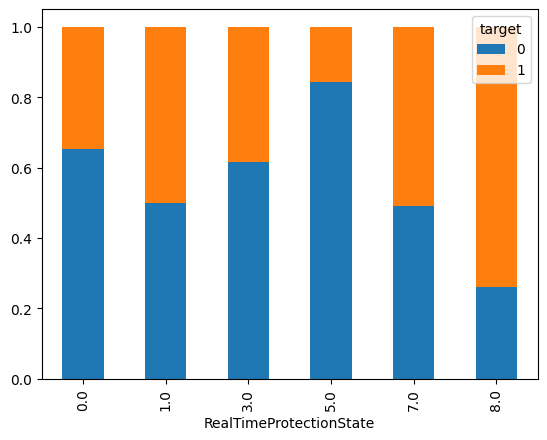

KeyError: 'FirewallEnabledIsSecureBootEnabled'

In [53]:
binary_columns = [
    'IsBetaUser',
    'IsPassiveModeEnabled',
    'HasTpm',
    'IsSystemProtected',
    'RealTimeProtectionState',
    'FirewallEnabled'
    'IsSecureBootEnabled',
    'HasOpticalDiskDrive',
    
    
]

# 2. Loop through each column and create a normalized plot
for column in binary_columns:
    # Create the normalized crosstab to get the rates
   count_ploting(df, affected_df, not_affected_df, column)

In [ ]:
group_categories_plot(df, affected_df, not_affected_df, 'RealTimeProtectionState',2 )

In [ ]:
count_classes(df, affected_df, not_affected_df, 'IsSystemProtected')
count_ploting(df, affected_df, not_affected_df, 'IsSystemProtected')

In [ ]:
count_classes(df, affected_df, not_affected_df, 'LocaleEnglishNameID')
sns.countplot(df, x="LocaleEnglishNameID")
plt.show()
sns.countplot(affected_df , x = "LocaleEnglishNameID")
sns.countplot(not_affected_df , x = "LocaleEnglishNameID")

plt.show()

# drop Locale English Name Id

In [ ]:

group_categories_plot(df, affected_df, not_affected_df, 'IEVersionID' ,5) 

# drop

In [ ]:
count_ploting(df, affected_df, not_affected_df, 'Processor' ) 

In [ ]:
count_classes(df, affected_df,not_affected_df, 'OSArchitecture' )
count_ploting(df,affected_df, not_affected_df, 'OSArchitecture') # Redundant to processor

In [ ]:
count_ploting(df, affected_df, not_affected_df, 'DeviceFamily') #drop

In [ ]:
#count_ploting(df, affected_df, not_affected_df, 'ProcessorCoreCount')
group_categories_plot(df, affected_df, not_affected_df, "ProcessorCoreCount" , 4)

In [ ]:
#plot_and_compare (df, affected_df, not_affected_df , 'PrimaryDisplayDiagonalInches') #Not useful
#plot_and_compare (df, affected_df, not_affected_df , 'PrimaryDisplayResolutionVertical')# Not useful

count_classes(df,affected_df, not_affected_df, 'PowerPlatformRole')

group_categories_plot(df,affected_df, not_affected_df,'PowerPlatformRole', 3) # good Predictor

In [ ]:
count_classes(df, affected_df, not_affected_df ,'InternalBatteryNumberOfCharges')
group_categories_plot(df, affected_df, not_affected_df, 'InternalBatteryNumberOfCharges',5) #useless

In [ ]:
count_ploting(df, affected_df, not_affected_df, 'OSVersion') # useless

In [ ]:
count_ploting(df, affected_df, not_affected_df, 'FirewallEnabled') # weak 

In [ ]:
group_categories_plot(df, affected_df, not_affected_df,'OSInstallType', 8) # good predictor strong top 8 

In [ ]:
def plot_and_compare_dates (df, affected, not_affected_df , column_name):
    """ Plots 2 things 
        1. histogram to visualise the distribution
        2. box plot to visualise the IQR for different classes. 
    """
    sns.histplot(data=df, x=column_name, kde=True)
    #histogram plot to show distribution
    plt.show()
    sns.histplot(data=affected_df, x=column_name, kde=True)
    #histogram plot to show distribution
    plt.show()
    sns.histplot(data=not_affected_df, x=column_name, kde=True)
    #histogram plot to show distribution
    plt.show()
      # Boxplot to compare the distribution
    sns.boxplot(data=df, x=column_name)
    plt.title('affected plot')
    plt.show()
    l.add(column)


In [ ]:
df['DateOS'] = pd.to_datetime(df['DateOS'], errors='coerce')# converts every date stirng to 
affected_df = df[df['target'] == 1]
not_affected_df = df[df['target'] == 0]
#plot_and_compare_dates(df, affected_df, not_affected_df , 'DateOS') #values are left skewed meaning there are many Pcs updated with recent updates 

oldest_age = df['DateOS'].min()
df['lastUpdateSince'] = (df['DateOS'] - oldest_age ).dt.days
affected_df = df[df['target'] ==1 ]
not_affected_df = df[df['target'] == 0 ] 

plot_and_compare(df, affected_df, not_affected_df , 'lastUpdateSince')

print(affected_df['lastUpdateSince'].median())

print(not_affected_df['lastUpdateSince'].median())

In [ ]:
len(l)

In [ ]:
df['DateAS'] = pd.to_datetime(df['DateAS'], errors='coerce')# converts every date stirng to 
affected_df = df[df['target'] == 1]
not_affected_df = df[df['target'] == 0]
#plot_and_compare_dates(df, affected_df, not_affected_df , 'DateOS') #values are left skewed meaning there are many Pcs updated with recent updates 

oldest_age = df['DateAS'].min()
df['lastSignatureSince'] = (df['DateAS'] - oldest_age ).dt.days
affected_df = df[df['target'] ==1 ]
not_affected_df = df[df['target'] == 0 ] 

plot_and_compare(df, affected_df, not_affected_df , 'lastSignatureSince')

print(affected_df['lastSignatureSince'].std())

print(not_affected_df['lastSignatureSince'].std())